Anime face generation


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files


uploaded = files.upload()




Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d splcher/animefacedataset



 98% 385M/395M [00:04<00:00, 103MB/s]
100% 395M/395M [00:04<00:00, 92.9MB/s]


In [ ]:
!unzip animefacedataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/62764_2019.jpg   
  inflating: images/62765_2019.jpg   
  inflating: images/62766_2019.jpg   
  inflating: images/62767_2019.jpg   
  inflating: images/62768_2019.jpg   
  inflating: images/62769_2019.jpg   
  inflating: images/6276_2003.jpg    
  inflating: images/62770_2019.jpg   
  inflating: images/62771_2019.jpg   
  inflating: images/62772_2019.jpg   
  inflating: images/62773_2019.jpg   
  inflating: images/62774_2019.jpg   
  inflating: images/62775_2019.jpg   
  inflating: images/62776_2019.jpg   
  inflating: images/62777_2019.jpg   
  inflating: images/62778_2019.jpg   
  inflating: images/62779_2019.jpg   
  inflating: images/6277_2003.jpg    
  inflating: images/62780_2019.jpg   
  inflating: images/62781_2019.jpg   
  inflating: images/62782_2019.jpg   
  inflating: images/62783_2019.jpg   
  inflating: images/62784_2019.jpg   
  inflating: images/62785_2019.jpg   
  inflating: images/62786_2019.jpg   

In [ ]:
import matplotlib.pyplot as plt
import os
from PIL import Image



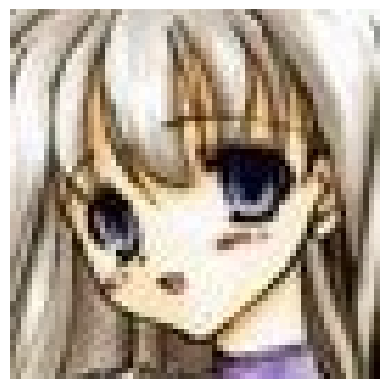

In [ ]:

dataset_dir = '/content/images'

files = os.listdir(dataset_dir)

image_path = os.path.join(dataset_dir, files[7])

image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as T


In [ ]:
image_size = 64
batch_size = 128
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)


In [ ]:

DATA_DIR = '/content/images'
print(os.listdir(DATA_DIR))

['36130_2011.jpg', '35857_2011.jpg', '29365_2010.jpg', '31164_2010.jpg', '23788_2008.jpg', '53764_2016.jpg', '12402_2005.jpg', '9207_2004.jpg', '27167_2009.jpg', '59160_2018.jpg', '37054_2012.jpg', '17012_2007.jpg', '45589_2014.jpg', '62597_2019.jpg', '23461_2008.jpg', '13176_2005.jpg', '45183_2014.jpg', '47733_2014.jpg', '43023_2013.jpg', '62676_2019.jpg', '61930_2019.jpg', '31980_2010.jpg', '26221_2009.jpg', '4768_2003.jpg', '10104_2004.jpg', '14210_2006.jpg', '15236_2006.jpg', '9039_2004.jpg', '43307_2013.jpg', '18829_2007.jpg', '954_2000.jpg', '43552_2013.jpg', '15442_2006.jpg', '46730_2014.jpg', '26048_2009.jpg', '54738_2016.jpg', '56451_2017.jpg', '9838_2004.jpg', '49834_2015.jpg', '47846_2014.jpg', '24225_2008.jpg', '52199_2015.jpg', '57891_2017.jpg', '42773_2013.jpg', '40804_2013.jpg', '52943_2016.jpg', '3219_2002.jpg', '60760_2018.jpg', '32952_2011.jpg', '63496_2019.jpg', '24450_2009.jpg', '15033_2006.jpg', '1150_2001.jpg', '44047_2013.jpg', '15017_2006.jpg', '37511_2012.jpg',

In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = os.path.join(self.root_dir, self.image_paths[idx])
        image = Image.open(image_path)
        if self.transform:
            image = self.transform(image)
        return image


In [ ]:
transform = T.Compose([
   T.Resize((64, 64)),
   T.ToTensor(),
   T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


root_dir = '/content/images'
custom_dataset = CustomDataset(root_dir, transform=transform)
data_loader = torch.utils.data.DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
print(type(data_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
print(data_loader)

In [ ]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

In [ ]:
def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break


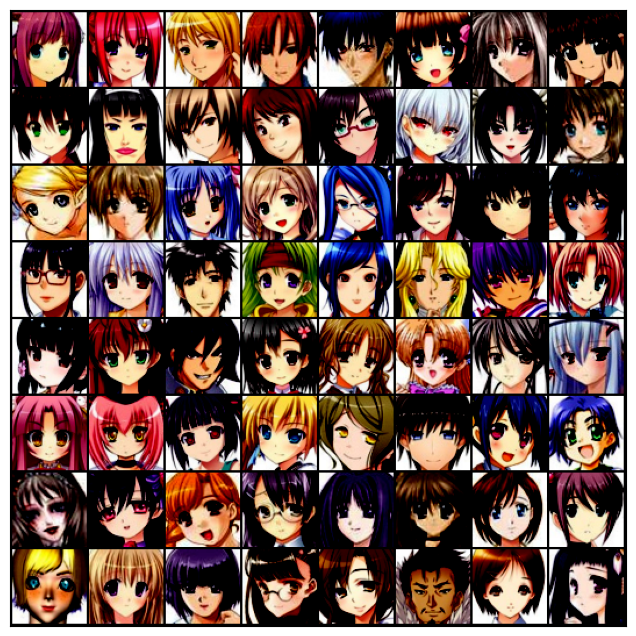

In [ ]:
show_batch(data_loader)

In [ ]:
import torch.nn as nn

discriminator = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2, inplace=True),

    nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=0, bias=False),
    nn.Sigmoid(),
    nn.Flatten()
)


In [ ]:
import torch.nn as nn

latent_size = 100

generator = nn.Sequential(


    nn.ConvTranspose2d(latent_size, 512, kernel_size=4, stride=1, padding=0, bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),


    nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),


    nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),


    nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1, bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),


    nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1, bias=False),
    nn.Tanh()
)


torch.Size([128, 3, 64, 64])


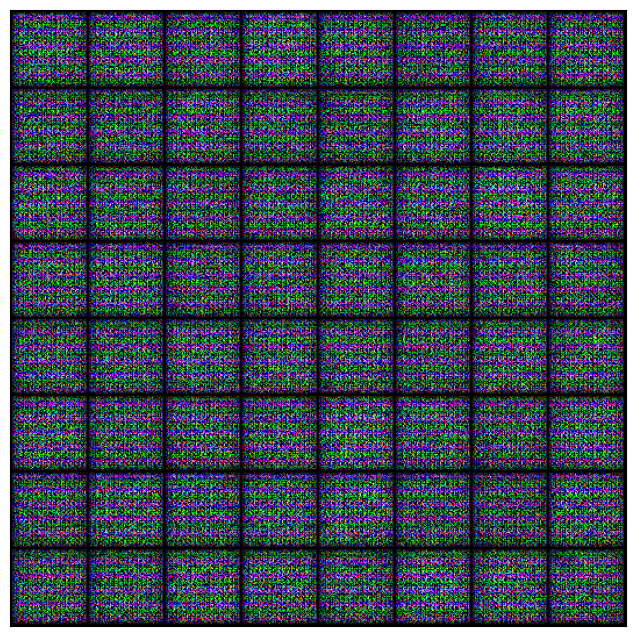

In [ ]:
xb = torch.randn(batch_size, latent_size, 1, 1)
fake_images = generator(xb)
print(fake_images.shape)
show_images(fake_images)

In [ ]:

def train_discriminator(real_images, opt_d):

    opt_d.zero_grad()


    real_preds = discriminator(real_images)
    real_targets = torch.ones(real_images.size(0), 1)
    real_loss = F.binary_cross_entropy(real_preds, real_targets)
    real_score = torch.mean(real_preds).item()


    latent = torch.randn(batch_size, latent_size, 1, 1)
    fake_images = generator(latent)

    fake_targets = torch.zeros(fake_images.size(0), 1)
    fake_preds = discriminator(fake_images)
    fake_loss = F.binary_cross_entropy(fake_preds, fake_targets)
    fake_score = torch.mean(fake_preds).item()


    loss = real_loss + fake_loss
    loss.backward()
    opt_d.step()
    return loss.item(), real_score, fake_score

In [ ]:
def train_generator(opt_g):
    opt_g.zero_grad()

    latent = torch.randn(batch_size, latent_size, 1, 1)
    fake_images = generator(latent)

    preds = discriminator(fake_images)
    targets = torch.ones(batch_size, 1)
    loss = F.binary_cross_entropy(preds, targets)

    loss.backward()
    opt_g.step()

    return loss.item()

In [ ]:
from torchvision.utils import save_image
sample_dir = 'generated'
os.makedirs(sample_dir, exist_ok=True)

In [ ]:
def save_samples(index, latent_tensors, show=True):
    fake_images = generator(latent_tensors)
    fake_fname = 'generated-images-{0:0=4d}.png'.format(index)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=8)
    print('Saving', fake_fname)
    if show:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(fake_images.cpu().detach(), nrow=8).permute(1, 2, 0))

Saving generated-images-0000.png


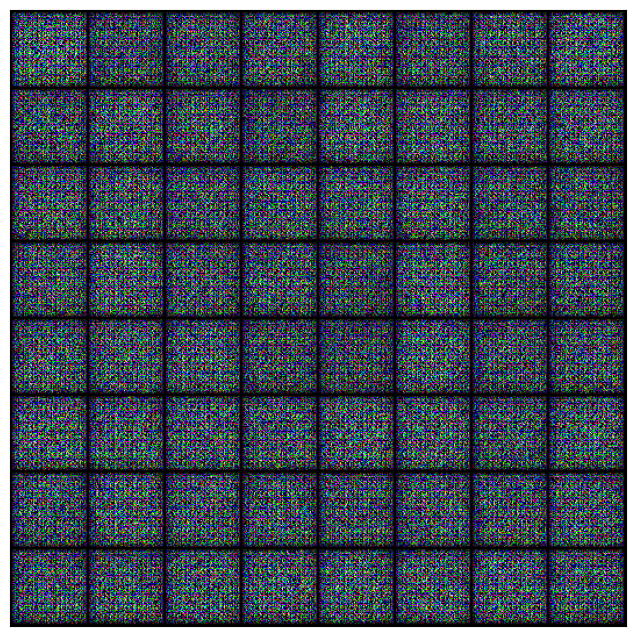

In [ ]:
fixed_latent = torch.randn(64, latent_size, 1, 1)
save_samples(0, fixed_latent)

In [ ]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [ ]:
def fit(epochs, lr, start_idx=1):
    torch.cuda.empty_cache()

    losses_g = []
    losses_d = []
    real_scores = []
    fake_scores = []

    opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))
    opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))

    for epoch in range(epochs):
        for real_images in tqdm(data_loader):
            loss_d, real_score, fake_score = train_discriminator(real_images, opt_d)
            loss_g = train_generator(opt_g)

        losses_g.append(loss_g)
        losses_d.append(loss_d)
        real_scores.append(real_score)
        fake_scores.append(fake_score)

        print("Epoch [{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))


        save_samples(epoch+start_idx, fixed_latent, show=False)

    return losses_g, losses_d, real_scores, fake_scores


In [ ]:
lr = 0.0002
epochs = 25

In [ ]:
losses_g, losses_d, real_scores, fake_scores = fit(epochs, lr)

  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [1/5], loss_g: 3.9251, loss_d: 0.6908, real_score: 0.6036, fake_score: 0.0423
Saving generated-images-0001.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [2/5], loss_g: 6.5549, loss_d: 0.5374, real_score: 0.9466, fake_score: 0.3542
Saving generated-images-0002.png


  0%|          | 0/497 [00:00<?, ?it/s]

Epoch [3/5], loss_g: 10.7105, loss_d: 0.9558, real_score: 0.9613, fake_score: 0.5503
Saving generated-images-0003.png


  0%|          | 0/497 [00:00<?, ?it/s]

In [ ]:
from IPython.display import Image

In [ ]:
Image('./generated/generated-images-0001.png')

In [ ]:
Image('./generated/generated-images-0005.png')

In [ ]:
Image('./generated/generated-images-0020.png')